# Patient Online - Geographic Analysis
#### Developed by: Mary Amanuel
#### Contact: mary.amanuel@nhsx.nhs.uk
#### Last Updated: 25th September 2021

In [142]:
import pandas as pd
import os
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
nhs_colours = ['#00A499', '#FFB81C', '#7C2855']


### Patient Online  - August 2021 Data 

In [60]:
POMI = pd.read_csv('data/POMI 2017_2021/POMI_APR2021_to_AUG2021.csv', sep = ',')
POMI

,report_period_end,region_code,region_name,ccg_code,ccg_name,practice_code,practice_name,system_supplier,field,value
0,30APR2021,Y56,NaN,36L,NHS South West London CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,Sys_Presc_Enbld,2.0
1,30APR2021,Y56,NaN,36L,NHS South West London CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,patient_list_size,12625.0
2,30APR2021,Y56,NaN,36L,NHS South West London CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,Pat_DetCodeRec_Enbld,15.0
3,30APR2021,Y56,NaN,36L,NHS South West London CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,Pat_Presc_Enbld,4816.0
4,30APR2021,Y56,NaN,36L,NHS South West London CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,New_Pat_Enbld,43.0
...,...,...,...,...,...,...,...,...,...,...
423080,31AUG2021,Y63,NaN,X2C4Y,NHS Kirklees CCG,Y06659,NOOK SURGERY,TPP,Sys_Presc_Enbld,2.0
423081,31AUG2021,Y63,NaN,X2C4Y,NHS Kirklees CCG,Y06659,NOOK SURGERY,TPP,Pat_Appts_Use,0.0
423082,31AUG2021,Y63,NaN,X2C4Y,NHS Kirklees CCG,Y06659,NOOK SURGERY,TPP,Pat_Appts_Enbld,633.0
423083,31AUG2021,Y63,NaN,X2C4Y,NHS Kirklees CCG,Y06659,NOOK SURGERY,TPP,Sys_Appts_Enbld,2.0


In [61]:
POMI['report_period_end'] = pd.to_datetime(POMI['report_period_end'])
POMI['ccg_name'] = POMI['ccg_name'].replace(['NHS Herefordshire CCG'],'NHS Herefordshire and Worcestershire CCG')
POMI['ccg_name'] = POMI['ccg_name'].replace(['NHS Herts Valley CCG'],'NHS Herts Valleys CCG')
POMI['ccg_name'] = POMI['ccg_name'].str.upper()
POMI['practice_name'] = POMI['practice_name'].str.upper()

POMI

,report_period_end,region_code,region_name,ccg_code,ccg_name,practice_code,practice_name,system_supplier,field,value
0,2021-04-30,Y56,NaN,36L,NHS SOUTH WEST LONDON CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,Sys_Presc_Enbld,2.0
1,2021-04-30,Y56,NaN,36L,NHS SOUTH WEST LONDON CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,patient_list_size,12625.0
2,2021-04-30,Y56,NaN,36L,NHS SOUTH WEST LONDON CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,Pat_DetCodeRec_Enbld,15.0
3,2021-04-30,Y56,NaN,36L,NHS SOUTH WEST LONDON CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,Pat_Presc_Enbld,4816.0
4,2021-04-30,Y56,NaN,36L,NHS SOUTH WEST LONDON CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,New_Pat_Enbld,43.0
...,...,...,...,...,...,...,...,...,...,...
423080,2021-08-31,Y63,NaN,X2C4Y,NHS KIRKLEES CCG,Y06659,NOOK SURGERY,TPP,Sys_Presc_Enbld,2.0
423081,2021-08-31,Y63,NaN,X2C4Y,NHS KIRKLEES CCG,Y06659,NOOK SURGERY,TPP,Pat_Appts_Use,0.0
423082,2021-08-31,Y63,NaN,X2C4Y,NHS KIRKLEES CCG,Y06659,NOOK SURGERY,TPP,Pat_Appts_Enbld,633.0
423083,2021-08-31,Y63,NaN,X2C4Y,NHS KIRKLEES CCG,Y06659,NOOK SURGERY,TPP,Sys_Appts_Enbld,2.0


In [62]:
POMI_pivot =  pd.pivot_table(POMI, index = ['report_period_end', 'ccg_name', 'practice_name', 'region_code', ], columns = 'field', values = 'value')
POMI_pivot

field                                                                                New_Pat_Enbld  \
report_period_end ccg_name         practice_name                        region_code                  
2021-04-30        NHS BARNSLEY CCG APOLLO COURT MEDICAL CENTRE          Y63                  130.0   
                                   ASHVILLE MEDICAL CENTRE PMS PRACTICE Y63                   49.0   
                                   BHF HIGHGATE SURGERY                 Y63                    6.0   
                                   BHF LUNDWOOD SURGERY                 Y63                   11.0   
                                   BRIERLEY MEDICAL CENTRE              Y63                    5.0   
...                                                                                            ...   
2021-08-31        NHS WIRRAL CCG   VILLA MED CTR                        Y62                   67.0   
                                   VITTORIA MED CTR G                   Y62                   37.0   
                                   VITTORIA MED CTR K                   Y62                   18.0   
                                   WEST WIRRAL GROUP PRACTICE           Y62                  175.0   
                                   WHETSTONE LANE MED CTR               Y62                   65.0   

field                                                                                Pat_Appts_Enbld  \
report_period_end ccg_name         practice_name                        region_code                    
2021-04-30        NHS BARNSLEY CCG APOLLO COURT MEDICAL CENTRE          Y63                   1897.0   
                                   ASHVILLE MEDICAL CENTRE PMS PRACTICE Y63                   2341.0   
                                   BHF HIGHGATE SURGERY                 Y63                   1542.0   
                                   BHF LUNDWOOD SURGERY                 Y63                   1421.0   
                                   BRIERLEY MEDICAL CENTRE              Y63                    868.0   
...                                                                                              ...   
2021-08-31        NHS WIRRAL CCG   VILLA MED CTR                        Y62                   3381.0   
                                   VITTORIA MED CTR G                   Y62                      0.0   
                                   VITTORIA MED CTR K                   Y62                    334.0   
                                   WEST WIRRAL GROUP PRACTICE           Y62                   6213.0   
                                   WHETSTONE LANE MED CTR               Y62                      0.0   

field                                                                                Pat_Appts_Use  \
report_period_end ccg_name         practice_name                        region_code                  
2021-04-30        NHS BARNSLEY CCG APOLLO COURT MEDICAL CENTRE          Y63                    0.0   
                                   ASHVILLE MEDICAL CENTRE PMS PRACTICE Y63                    7.0   
                                   BHF HIGHGATE SURGERY                 Y63                    1.0   
                                   BHF LUNDWOOD SURGERY                 Y63                    0.0   
                                   BRIERLEY MEDICAL CENTRE              Y63                    4.0   
...                                                                                            ...   
2021-08-31        NHS WIRRAL CCG   VILLA MED CTR                        Y62                    4.0   
                                   VITTORIA MED CTR G                   Y62                    0.0   
                                   VITTORIA MED CTR K                   Y62                    0.0   
                                   WEST WIRRAL GROUP PRACTICE           Y62                  435.0   
                                   WHETSTONE LANE MED CTR               Y62                    0

In [63]:
POMI_filter = POMI_pivot.drop(['New_Pat_Enbld','Pat_Appts_Enbld', 'Pat_DetCodeRec_Enbld','Pat_DetCodeRec_Use','Pat_Presc_Enbld','Sys_Appts_Enbld','Sys_DetCodeRec_Enbld','Sys_Presc_Enbld','Total_Pat_Enbld'], axis=1)
POMI_filter = POMI_filter.reset_index()
POMI_filter

field,report_period_end,ccg_name,practice_name,region_code,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size
0,2021-04-30,NHS BARNSLEY CCG,APOLLO COURT MEDICAL CENTRE,Y63,0.0,631.0,10282.0,5004.0
1,2021-04-30,NHS BARNSLEY CCG,ASHVILLE MEDICAL CENTRE PMS PRACTICE,Y63,7.0,916.0,2475.0,12347.0
2,2021-04-30,NHS BARNSLEY CCG,BHF HIGHGATE SURGERY,Y63,1.0,556.0,766.0,3291.0
3,2021-04-30,NHS BARNSLEY CCG,BHF LUNDWOOD SURGERY,Y63,0.0,562.0,707.0,3452.0
4,2021-04-30,NHS BARNSLEY CCG,BRIERLEY MEDICAL CENTRE,Y63,4.0,499.0,598.0,3105.0
...,...,...,...,...,...,...,...,...
32475,2021-08-31,NHS WIRRAL CCG,VILLA MED CTR,Y62,4.0,1112.0,31739.0,6104.0
32476,2021-08-31,NHS WIRRAL CCG,VITTORIA MED CTR G,Y62,0.0,383.0,8940.0,4747.0
32477,2021-08-31,NHS WIRRAL CCG,VITTORIA MED CTR K,Y62,0.0,25.0,2060.0,1667.0
32478,2021-08-31,NHS WIRRAL CCG,WEST WIRRAL GROUP PRACTICE,Y62,435.0,1868.0,71021.0,14077.0


In [64]:
patient_list_size_check = POMI_filter[['report_period_end','patient_list_size']].groupby('report_period_end').sum()
patient_list_size_check 

field,patient_list_size
report_period_end,
2021-04-30,60291477.5
2021-05-31,60388741.0
2021-06-30,60413296.0
2021-07-31,60421937.5
2021-08-31,60635688.5


In [65]:
POMI_filter.report_period_end = POMI_filter.report_period_end.astype(str)
POMI_filter.dtypes

field
report_period_end     object
ccg_name              object
practice_name         object
region_code           object
Pat_Appts_Use        float64
Pat_Presc_Use        float64
Total_Use            float64
patient_list_size    float64
dtype: object

In [66]:
POMI_august_2021 = POMI_filter[POMI_filter['report_period_end'] == '2021-08-31']
POMI_august_2021

field,report_period_end,ccg_name,practice_name,region_code,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size
26005,2021-08-31,NHS BARNSLEY CCG,APOLLO COURT MEDICAL CENTRE,Y63,0.0,861.0,11904.0,5030.0
26006,2021-08-31,NHS BARNSLEY CCG,ASHVILLE MEDICAL CENTRE PMS PRACTICE,Y63,617.0,1421.0,5562.0,12358.0
26007,2021-08-31,NHS BARNSLEY CCG,BHF HIGHGATE SURGERY,Y63,4.0,599.0,614.0,3229.0
26008,2021-08-31,NHS BARNSLEY CCG,BHF LUNDWOOD SURGERY,Y63,2.0,595.0,597.0,3408.0
26009,2021-08-31,NHS BARNSLEY CCG,BRIERLEY MEDICAL CENTRE,Y63,9.0,503.0,521.0,3125.0
...,...,...,...,...,...,...,...,...
32475,2021-08-31,NHS WIRRAL CCG,VILLA MED CTR,Y62,4.0,1112.0,31739.0,6104.0
32476,2021-08-31,NHS WIRRAL CCG,VITTORIA MED CTR G,Y62,0.0,383.0,8940.0,4747.0
32477,2021-08-31,NHS WIRRAL CCG,VITTORIA MED CTR K,Y62,0.0,25.0,2060.0,1667.0
32478,2021-08-31,NHS WIRRAL CCG,WEST WIRRAL GROUP PRACTICE,Y62,435.0,1868.0,71021.0,14077.0


In [67]:
POMI_august_2021_cgg = POMI_august_2021[['ccg_name', 'region_code', 'Pat_Appts_Use', 'Pat_Presc_Use', 'patient_list_size']].groupby('ccg_name').sum()
POMI_august_2021_cgg.reset_index()

field,ccg_name,Pat_Appts_Use,Pat_Presc_Use,patient_list_size
0,NHS BARNSLEY CCG,2316.0,40265.0,264891.0
1,NHS BASILDON AND BRENTWOOD CCG,4230.0,27135.0,276465.0
2,NHS BASSETLAW CCG,1003.0,20840.0,121080.0
3,"NHS BATH AND NORTH EAST SOMERSET, SWINDON AND ...",22936.0,112303.0,965079.0
4,"NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES CCG",16569.0,150942.0,1056306.0
...,...,...,...,...
101,NHS WEST LEICESTERSHIRE CCG,12732.0,58148.0,404415.0
102,NHS WEST SUFFOLK CCG,4277.0,17625.0,260857.0
103,NHS WEST SUSSEX CCG,10261.0,100643.0,899055.0
104,NHS WIGAN BOROUGH CCG,1124.0,37771.0,336205.0


In [68]:
patient_list_size_check_ccg = POMI_august_2021[['ccg_name','patient_list_size']].groupby('ccg_name').sum()
patient_list_size_check_ccg

field,patient_list_size
ccg_name,
NHS BARNSLEY CCG,264891.0
NHS BASILDON AND BRENTWOOD CCG,276465.0
NHS BASSETLAW CCG,121080.0
"NHS BATH AND NORTH EAST SOMERSET, SWINDON AND WILTSHIRE CCG",965079.0
"NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES CCG",1056306.0
...,...
NHS WEST LEICESTERSHIRE CCG,404415.0
NHS WEST SUFFOLK CCG,260857.0
NHS WEST SUSSEX CCG,899055.0


In [79]:
POMI_august_2021_cgg['Pat_Presc_Use_per_10000'] = (POMI_august_2021_cgg['Pat_Presc_Use'] / POMI_august_2021_cgg['patient_list_size']) * 10000
POMI_august_2021_cgg['Pat_Appts_Use_per_10000'] = (POMI_august_2021_cgg['Pat_Appts_Use'] / POMI_august_2021_cgg['patient_list_size']) * 10000
POMI_final = POMI_august_2021_cgg.round(2)
POMI_final

field,Pat_Appts_Use,Pat_Presc_Use,patient_list_size,Pat_Presc_Use_per_10000,Pat_Appts_Use_per_10000
ccg_name,,,,,
NHS BARNSLEY CCG,2316.0,40265.0,264891.0,1520.06,87.43
NHS BASILDON AND BRENTWOOD CCG,4230.0,27135.0,276465.0,981.50,153.00
NHS BASSETLAW CCG,1003.0,20840.0,121080.0,1721.18,82.84
"NHS BATH AND NORTH EAST SOMERSET, SWINDON AND WILTSHIRE CCG",22936.0,112303.0,965079.0,1163.67,237.66
"NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES CCG",16569.0,150942.0,1056306.0,1428.96,156.86
...,...,...,...,...,...
NHS WEST LEICESTERSHIRE CCG,12732.0,58148.0,404415.0,1437.83,314.83
NHS WEST SUFFOLK CCG,4277.0,17625.0,260857.0,675.66,163.96
NHS WEST SUSSEX CCG,10261.0,100643.0,899055.0,1119.43,114.13


### Merging CCG CODES / ONS CODES

In [80]:
CCG_APRIL_2021_CODES_ONS = pd.read_csv('data/POMI 2017_2021/Clinical_Commissioning_Groups_(April_2021)_Names_and_Codes_in_England.csv', sep = ',')
CCG_APRIL_2021_CODES_ONS 

,FID,CCG21CD,CCG21CDH,CCG21NM
0,1,E38000006,02P,NHS Barnsley CCG
1,2,E38000007,99E,NHS Basildon and Brentwood CCG
2,3,E38000008,02Q,NHS Bassetlaw CCG
3,4,E38000014,00Q,NHS Blackburn with Darwen CCG
4,5,E38000015,00R,NHS Blackpool CCG
...,...,...,...,...
101,102,E38000253,D9Y0V,"NHS Hampshire, Southampton and Isle of Wight CCG"
102,103,E38000254,X2C4Y,NHS Kirklees CCG
103,104,E38000255,A3A8R,NHS North East London CCG
104,105,E38000256,W2U3Z,NHS North West London CCG


In [81]:
CCG_APRIL_2021_CODES_ONS['CCG21NM']= CCG_APRIL_2021_CODES_ONS['CCG21NM'].str.upper()
CCG_APRIL_2021_CODES_ONS

,FID,CCG21CD,CCG21CDH,CCG21NM
0,1,E38000006,02P,NHS BARNSLEY CCG
1,2,E38000007,99E,NHS BASILDON AND BRENTWOOD CCG
2,3,E38000008,02Q,NHS BASSETLAW CCG
3,4,E38000014,00Q,NHS BLACKBURN WITH DARWEN CCG
4,5,E38000015,00R,NHS BLACKPOOL CCG
...,...,...,...,...
101,102,E38000253,D9Y0V,"NHS HAMPSHIRE, SOUTHAMPTON AND ISLE OF WIGHT CCG"
102,103,E38000254,X2C4Y,NHS KIRKLEES CCG
103,104,E38000255,A3A8R,NHS NORTH EAST LONDON CCG
104,105,E38000256,W2U3Z,NHS NORTH WEST LONDON CCG


In [101]:
CCG_codes = CCG_APRIL_2021_CODES_ONS.merge(POMI_final, left_on='CCG21NM', right_on ='ccg_name')
data_set_data_wrapper_mapping = CCG_codes.rename(columns={'CCG21NM': 'Name'})
CCG_code_results = data_set_data_wrapper_mapping.sort_values(by='Name', ascending=True)
CCG_code_results

,FID,CCG21CD,CCG21CDH,Name,Pat_Appts_Use,Pat_Presc_Use,patient_list_size,Pat_Presc_Use_per_10000,Pat_Appts_Use_per_10000
0,1,E38000006,02P,NHS BARNSLEY CCG,2316.0,40265.0,264891.0,1520.06,87.43
1,2,E38000007,99E,NHS BASILDON AND BRENTWOOD CCG,4230.0,27135.0,276465.0,981.50,153.00
2,3,E38000008,02Q,NHS BASSETLAW CCG,1003.0,20840.0,121080.0,1721.18,82.84
79,80,E38000231,92G,"NHS BATH AND NORTH EAST SOMERSET, SWINDON AND ...",22936.0,112303.0,965079.0,1163.67,237.66
97,98,E38000249,M1J4Y,"NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES CCG",16569.0,150942.0,1056306.0,1428.96,156.86
...,...,...,...,...,...,...,...,...,...
62,63,E38000201,04V,NHS WEST LEICESTERSHIRE CCG,12732.0,58148.0,404415.0,1437.83,314.83
63,64,E38000204,07K,NHS WEST SUFFOLK CCG,4277.0,17625.0,260857.0,675.66,163.96
96,97,E38000248,70F,NHS WEST SUSSEX CCG,10261.0,100643.0,899055.0,1119.43,114.13
64,65,E38000205,02H,NHS WIGAN BOROUGH CCG,1124.0,37771.0,336205.0,1123.45,33.43


In [102]:
CCG_code_results.to_csv('POMI_CCG_Results_August_2021.csv')

### Regional Bar Charts

In [118]:
POMI_august_2021_region = POMI_august_2021[['ccg_name', 'region_code', 'Pat_Appts_Use', 'Pat_Presc_Use', 'patient_list_size']].groupby('region_code').sum()
POMI_august_2021_region.reset_index()

field,region_code,Pat_Appts_Use,Pat_Presc_Use,patient_list_size
0,Y56,82215.5,397654.0,10418477.5
1,Y58,85731.0,576012.0,5919055.0
2,Y59,89467.0,782523.0,9449019.0
3,Y60,124756.0,1066293.5,11268328.0
4,Y61,108235.0,718133.0,6886159.0
5,Y62,31453.0,756858.0,7620602.0
6,Y63,116123.0,1100423.0,9074048.0


In [119]:
patient_list_size_check_region = POMI_august_2021_region['patient_list_size'].sum()
patient_list_size_check_region 

60635688.5

In [138]:
POMI_august_2021_region['Pat_Presc_Use_per_10000'] = (POMI_august_2021_region['Pat_Presc_Use'] / POMI_august_2021_region['patient_list_size']) * 10000
POMI_august_2021_region['Pat_Appts_Use_per_10000'] = (POMI_august_2021_region['Pat_Appts_Use'] / POMI_august_2021_region['patient_list_size']) * 10000
POMI_region = POMI_august_2021_region.round(2)
region_name = {'Y56': 'London', 'Y58': 'South West', 'Y59': 'South East', 'Y60': 'Midlands', 'Y61': 'East of England', 'Y61': 'East of England', 'Y62': 'North West', 'Y63': 'North East and Yorkshire'}
POMI_region_code_names = POMI_region.reset_index()

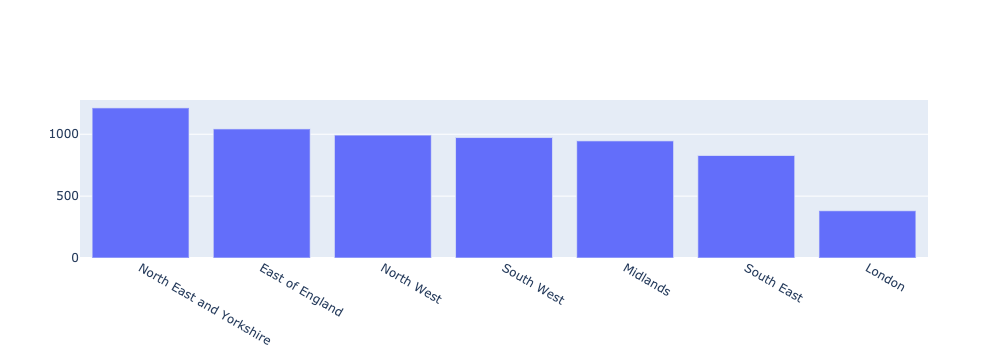

In [173]:
POMI_region_code_names['region_name'] = POMI_region_code_names['region_code'].map(region_name)
Region_code_results_presc = POMI_region_code_names.sort_values(by='Pat_Presc_Use_per_10000', ascending=False)
Region_code_results_presc

data0 = go.Bar(
    x = Region_code_results_presc.region_name,
    y = Region_code_results_presc.Pat_Presc_Use_per_10000)

figure = go.Figure(data = data0)
figure.show()

In [176]:

# Write chart to file (.html)
config = {"displayModeBar": False, "displaylogo": False}
plotly_obj = plotly.offline.plot(
    fig, include_plotlyjs=False, output_type="div", config=config
)
with open("_includes/prescriptions.html", "w") as file:
    file.write(plotly_obj)

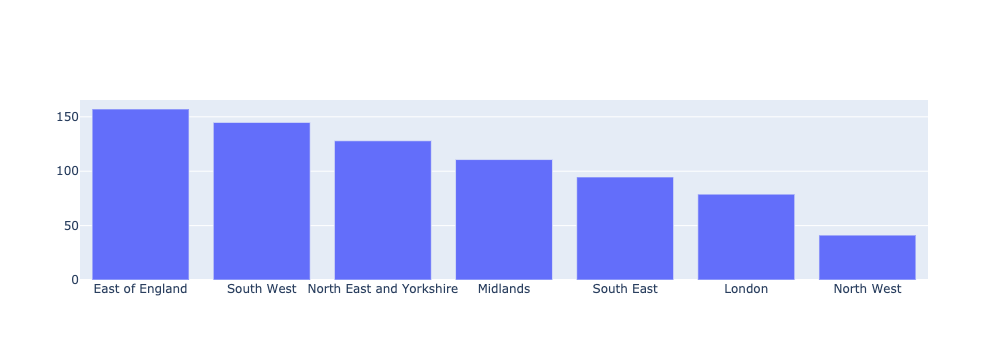

In [177]:
POMI_region_code_names['region_name'] = POMI_region_code_names['region_code'].map(region_name)
Region_code_results_appts= POMI_region_code_names.sort_values(by='Pat_Appts_Use_per_10000', ascending=False)

data1 = go.Bar(
    x = Region_code_results_appts.region_name,
    y = Region_code_results_appts.Pat_Appts_Use_per_10000)

figure = go.Figure(data = data1)
figure.show()

In [178]:

# Write chart to file (.html)
config = {"displayModeBar": False, "displaylogo": False}
plotly_obj = plotly.offline.plot(
    fig, include_plotlyjs=False, output_type="div", config=config
)
with open("_includes/appointments.html", "w") as file:
    file.write(plotly_obj)